In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [88]:
df = pd.read_csv('/workspaces/Repository_Data_Science_Challenges/Desafios/F1/Data/Base.csv')

In [89]:
df.drop('Unnamed: 0', axis = 'columns',  inplace = True)

In [90]:
Graph2024 = df[df['year'] == 2024]
Graph2024

,raceId,year,date,name,forename,driverRef,grid,position,points
0,1144,2024,2024-12-08,Abu Dhabi Grand Prix,Lando,norris,1,1,25.0
1,1144,2024,2024-12-08,Abu Dhabi Grand Prix,Carlos,sainz,3,2,18.0
2,1144,2024,2024-12-08,Abu Dhabi Grand Prix,Charles,leclerc,19,3,15.0
3,1144,2024,2024-12-08,Abu Dhabi Grand Prix,Lewis,hamilton,16,4,12.0
4,1144,2024,2024-12-08,Abu Dhabi Grand Prix,George,russell,6,5,10.0
...,...,...,...,...,...,...,...,...,...
474,1121,2024,2024-03-02,Bahrain Grand Prix,Nico,hulkenberg,10,16,0.0
475,1121,2024,2024-03-02,Bahrain Grand Prix,Esteban,ocon,19,17,0.0
476,1121,2024,2024-03-02,Bahrain Grand Prix,Pierre,gasly,20,18,0.0
477,1121,2024,2024-03-02,Bahrain Grand Prix,Valtteri,bottas,16,19,0.0


In [91]:
names2024 = set(Graph2024['forename'].unique())

In [92]:
names2024

{'Alexander',
 'Carlos',
 'Charles',
 'Daniel',
 'Esteban',
 'Fernando',
 'Franco',
 'George',
 'Guanyu',
 'Jack',
 'Kevin',
 'Lance',
 'Lando',
 'Lewis',
 'Liam',
 'Logan',
 'Max',
 'Nico',
 'Oliver',
 'Oscar',
 'Pierre',
 'Sergio',
 'Valtteri',
 'Yuki'}

In [93]:
Nomes2024 = pd.DataFrame(list(names2024), columns=["forename"])

In [94]:
Nomes2024

,forename
0,Nico
1,Logan
2,Alexander
3,George
4,Fernando
5,Max
6,Lewis
7,Oliver
8,Daniel
9,Liam


In [95]:
Wins2024 = Graph2024[Graph2024['position'] == 1]['forename'].value_counts()

In [96]:
Plot = pd.merge(Nomes2024, Wins2024, how = 'left',on = 'forename')

In [97]:
Plot.fillna(0, inplace = True)

In [98]:
Plot = Plot.sort_values(by = ['count'], ascending = False)

In [99]:
Plot

,forename,count
5,Max,9.0
12,Lando,4.0
14,Charles,3.0
3,George,2.0
22,Carlos,2.0
15,Oscar,2.0
6,Lewis,2.0
0,Nico,0.0
7,Oliver,0.0
4,Fernando,0.0


In [100]:
cores_por_piloto = {
    # Red Bull Racing
    'Max': "#831010",
    'Sergio': '#831010',

    # Mercedes
    'Lewis': '#27F4D2',
    'George': '#27F4D2',

    # Ferrari
    'Charles': '#E80020',
    'Carlos': '#E80020',
    'Oliver': '#E80020',

    # McLaren
    'Lando': '#FF8000',
    'Oscar': '#FF8000',

    # Aston Martin
    'Fernando': '#229971',
    'Lance': '#229971',

    # Alpine
    'Esteban': '#0093CC',
    'Pierre': '#0093CC',
    'Jack': '#0093CC',

    # Williams
    'Alexander': '#64C4FF',
    'Logan': '#64C4FF',
    'Franco': '#64C4FF',

    # Visa Cash App RB (Racing Bulls)
    'Daniel': '#6692FF',
    'Yuki': '#6692FF',
    'Liam': '#6692FF',

    # Kick Sauber
    'Valtteri': '#52E252',
    'Guanyu': '#52E252',

    # Haas
    'Kevin': '#B6BABD',
    'Nico': '#B6BABD'
}

In [101]:
cores = Plot['forename'].map(cores_por_piloto)
print(cores.isna().sum())  # Mostra quantos pilotos ficaram sem cor
print(Plot[cores.isna()]) # Mostra quais pilotos não foram mapeados


0
Empty DataFrame
Columns: [forename, count]
Index: []


<Figure size 4000x1800 with 0 Axes>

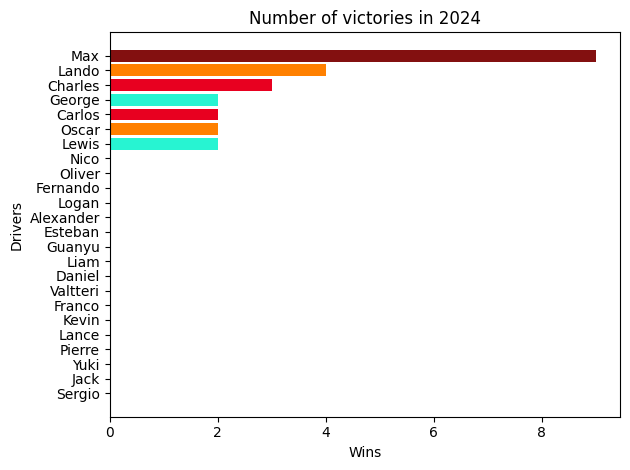

<Figure size 4000x1800 with 0 Axes>

In [102]:
plt.barh(Plot['forename'], Plot['count'], color = cores)
plt.title('Number of victories in 2024')
plt.gca().invert_yaxis()
plt.xlabel('Wins')
plt.ylabel('Drivers')
plt.tight_layout()
plt.figure(figsize=(40, 18))